In [2]:
install.packages('nortest')
install.packages('carData')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


#### 5.4 
An engineer suspects that the surface finish of a metal part is influenced by the feed rate and the depth of cut. He selects three feed rates and four depths of cut. He then conducts a factorial experiment and obtains the following data.

* Analyze using $\alpha=0.05$
* Prepare appropriate resiual plots and comment on the model's adequacy.
* Obatin point estimates of the mean surface finish at each feed rate. 
* Find the p-values for the tests in part (a)

#### Answer:
Both factors are very significant with p values 10^-9>. From the qqplot we can see that the errors closely follow a normal distribution which tells us the model is a decent model. From the residuals vs each factor we can see that the variance slightly changes as the numerical values increase. It is not enough to say that the errors change significantly as the factors increase. P values reported in below in the graph.

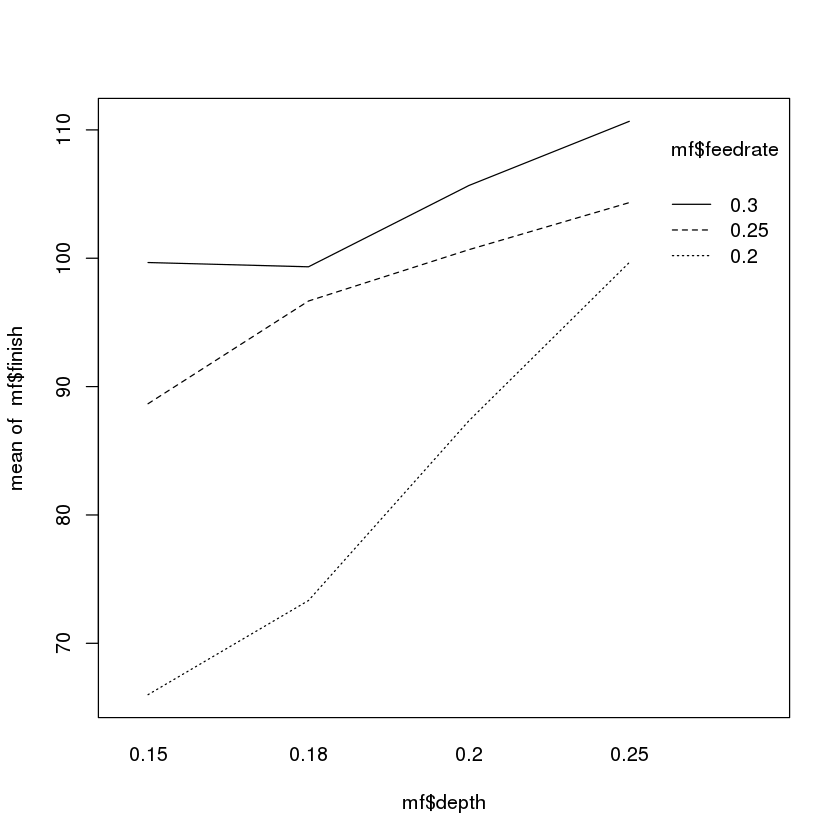

In [3]:
depth = rep(rep(c(0.15,0.18,0.20,0.25), 3), each=3)
feedrate = rep(c(0.20,0.25,0.30), each=12)
finish = c(74,64,60,79,68,73,82,88,92,99,104,96, 92,86,88,98,104,88,99,
           108,95,104,110,99,99,98,102,104,99,95,108,110,99,114,111,107)
mf = data.frame(feedrate, depth, finish)

#################################
##     Interaction plot         #
#################################
interaction.plot(mf$depth, mf$feedrate, mf$finish)



    feedrate        depth            finish      
 Min.   :0.20   Min.   :0.1500   Min.   : 60.00  
 1st Qu.:0.20   1st Qu.:0.1725   1st Qu.: 88.00  
 Median :0.25   Median :0.1900   Median : 98.50  
 Mean   :0.25   Mean   :0.1950   Mean   : 94.33  
 3rd Qu.:0.30   3rd Qu.:0.2125   3rd Qu.:104.00  
 Max.   :0.30   Max.   :0.2500   Max.   :114.00  

               Df Sum Sq Mean Sq F value   Pr(>F)    
depth           1 2042.3  2042.3   59.08 9.22e-09 ***
feedrate        1 2970.4  2970.4   85.93 1.40e-10 ***
depth:feedrate  1  413.2   413.2   11.96  0.00156 ** 
Residuals      32 1106.1    34.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

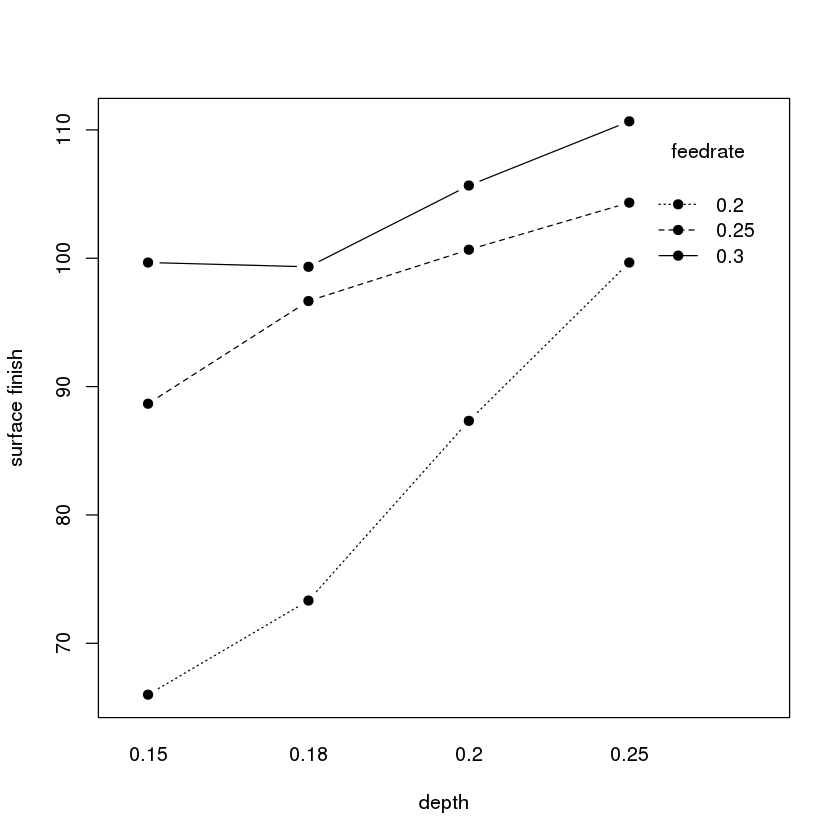

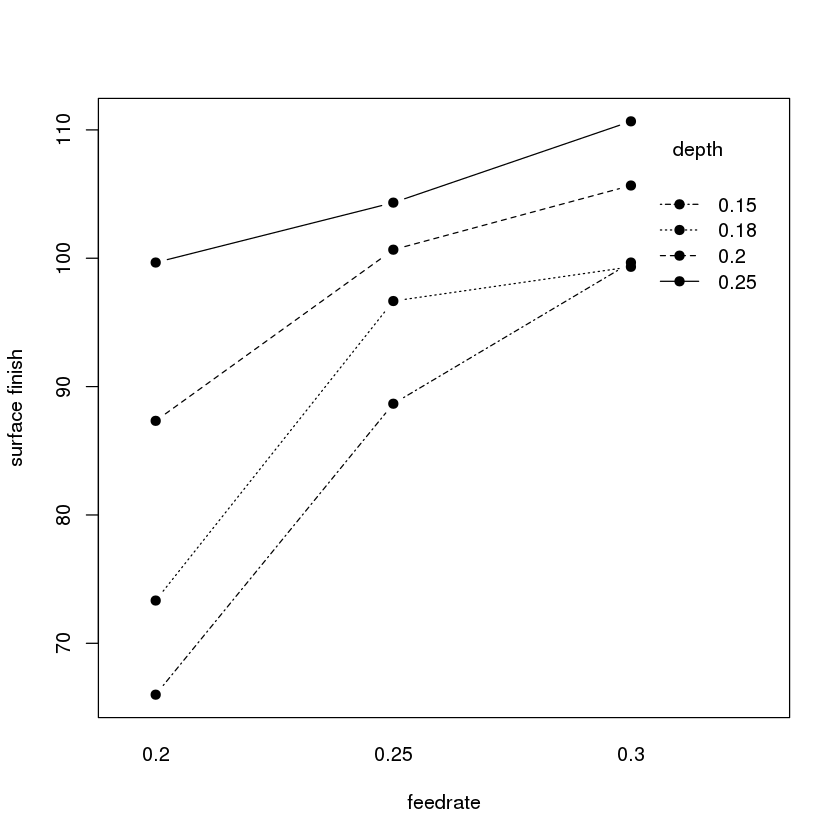

In [4]:
################################################################
##    Statistical analysis of the two-factor factorial design  #
################################################################
summary(mf)
a=3;b=3;n=3

mf.aov=aov(finish ~ depth*feedrate,data=mf)
summary(mf.aov)
mse=summary(mf.aov)[[1]][4,3]

#create interaction plots
with(mf, interaction.plot(depth,feedrate,finish,type="b",pch=19, fixed=T,xlab="depth",ylab="surface finish"))
with(mf, interaction.plot(feedrate,depth,finish,type="b",pch=19, fixed=T,xlab="feedrate",ylab="surface finish"))

# multiple comparisons (Tukey's method)
# compare the main effect difference
#TukeyHSD(mf.aov, which="depth") 
# compare the main effect difference 
#TukeyHSD(mf.aov, which="feedrate") 



M,x
0.2,81.58333


character(0)

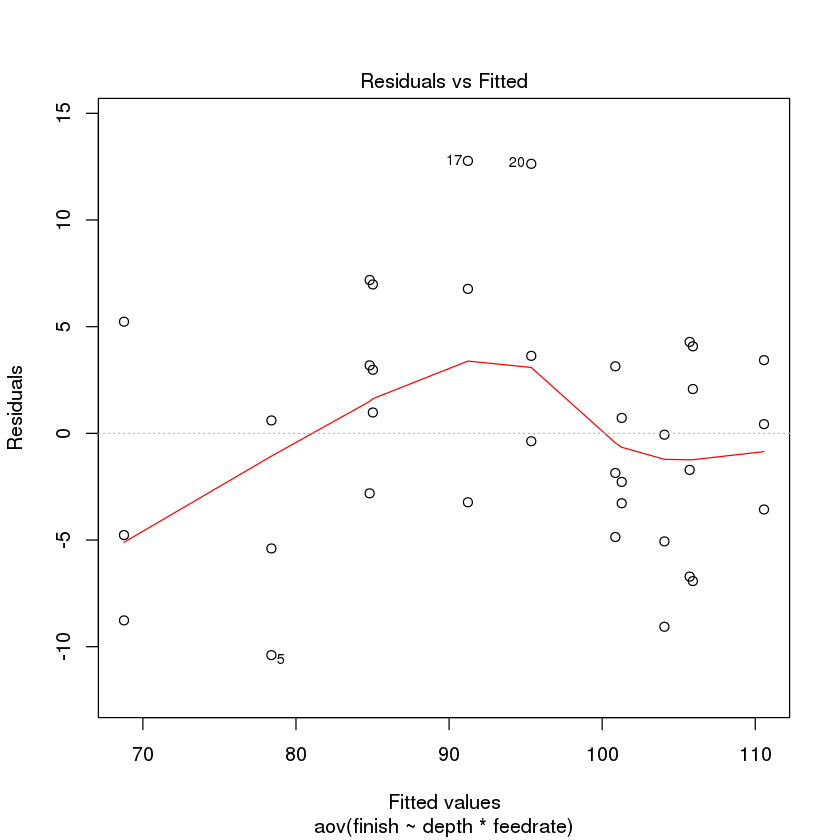

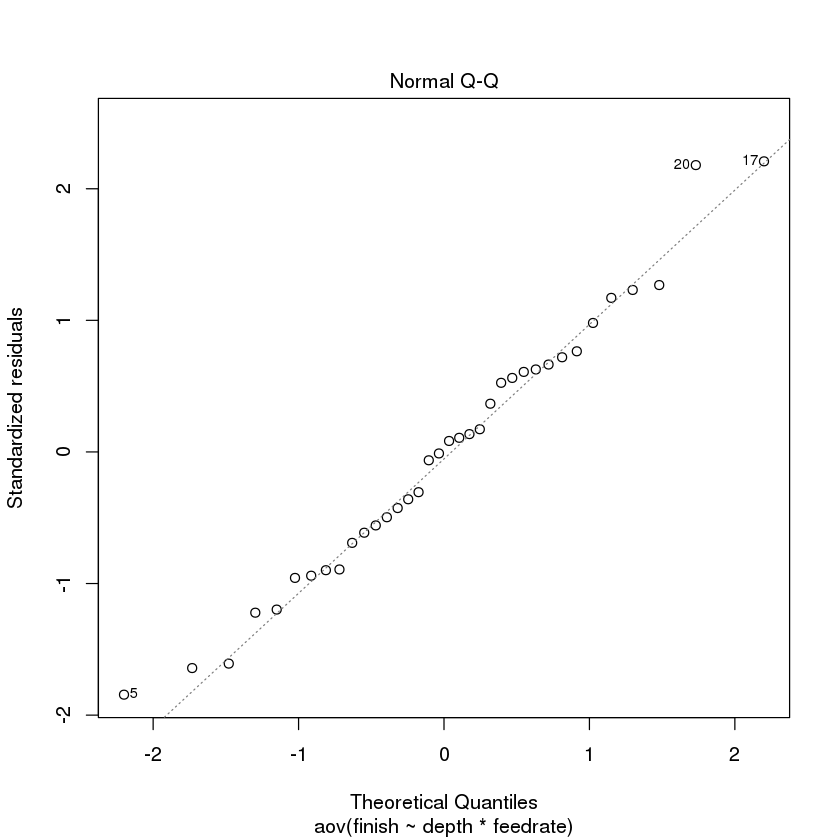

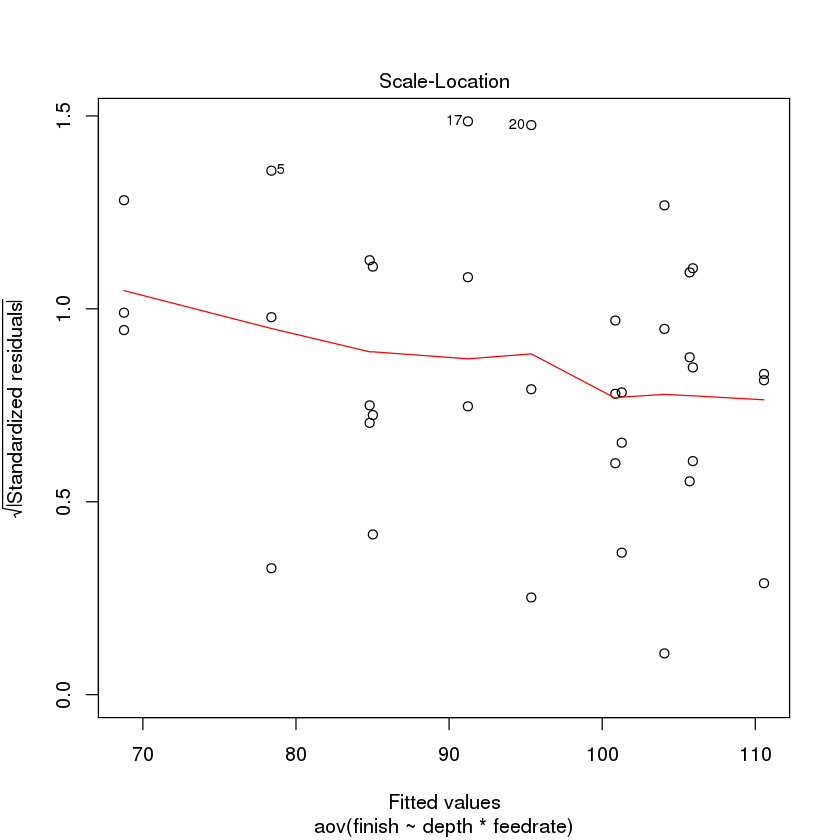

Loading required package: carData


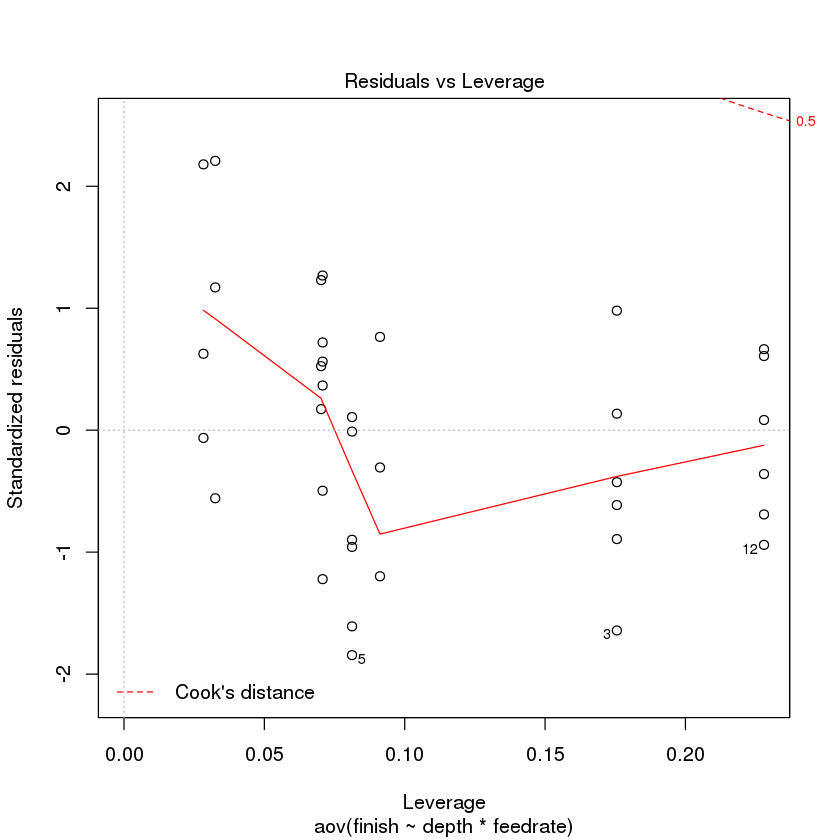

[1] 17 20

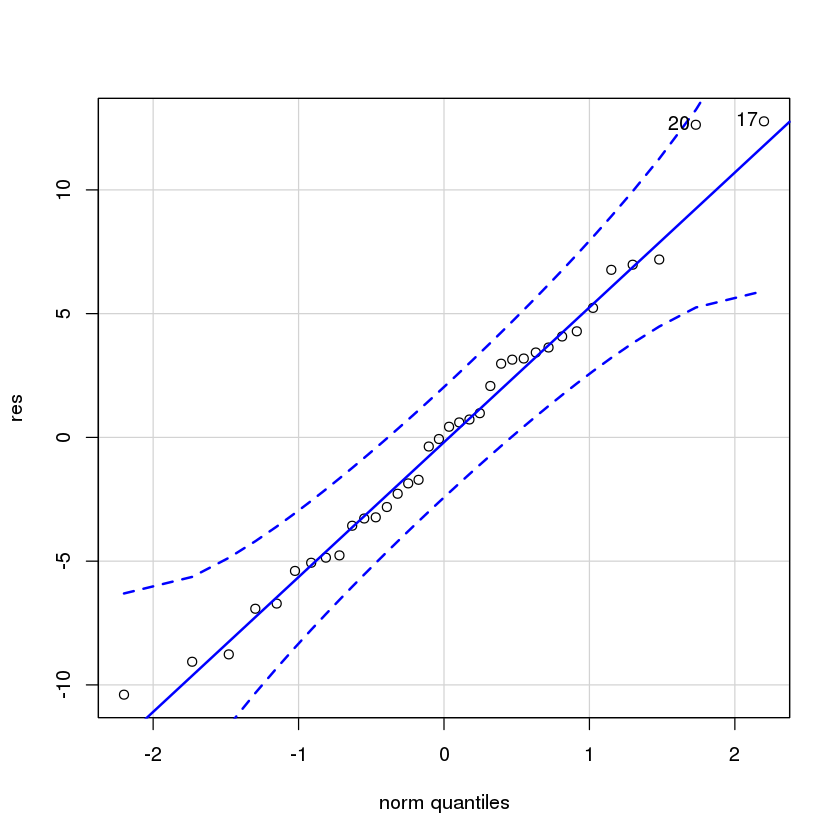

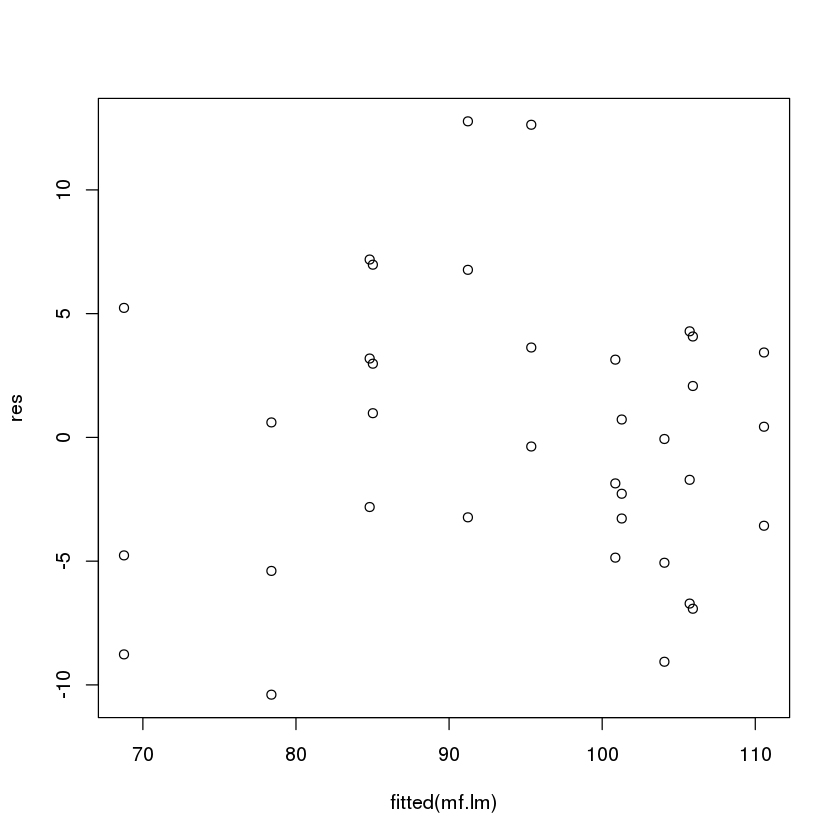

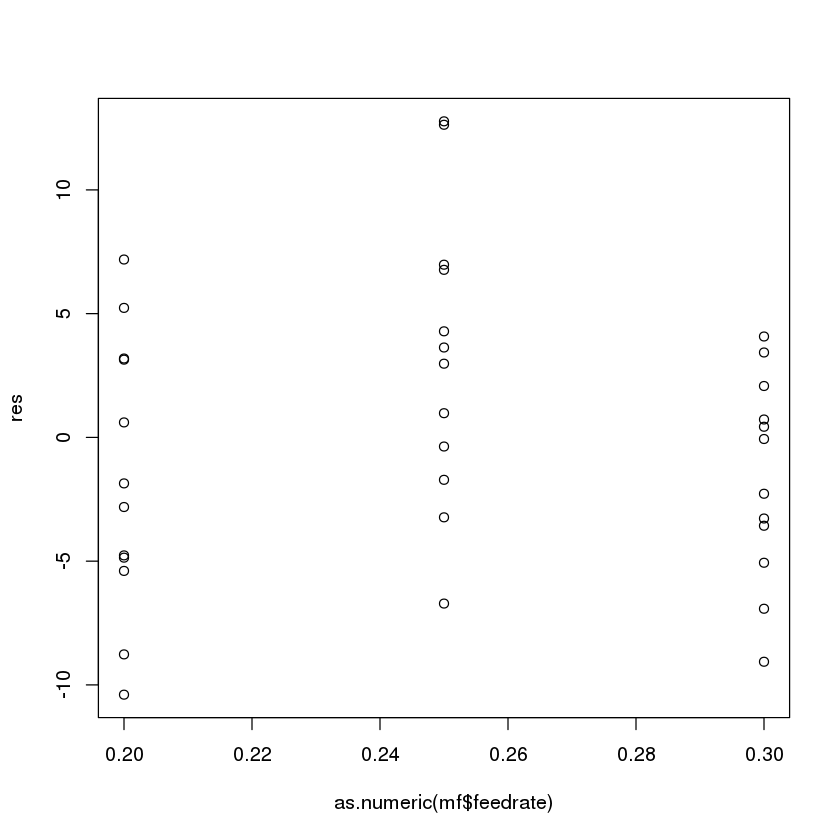

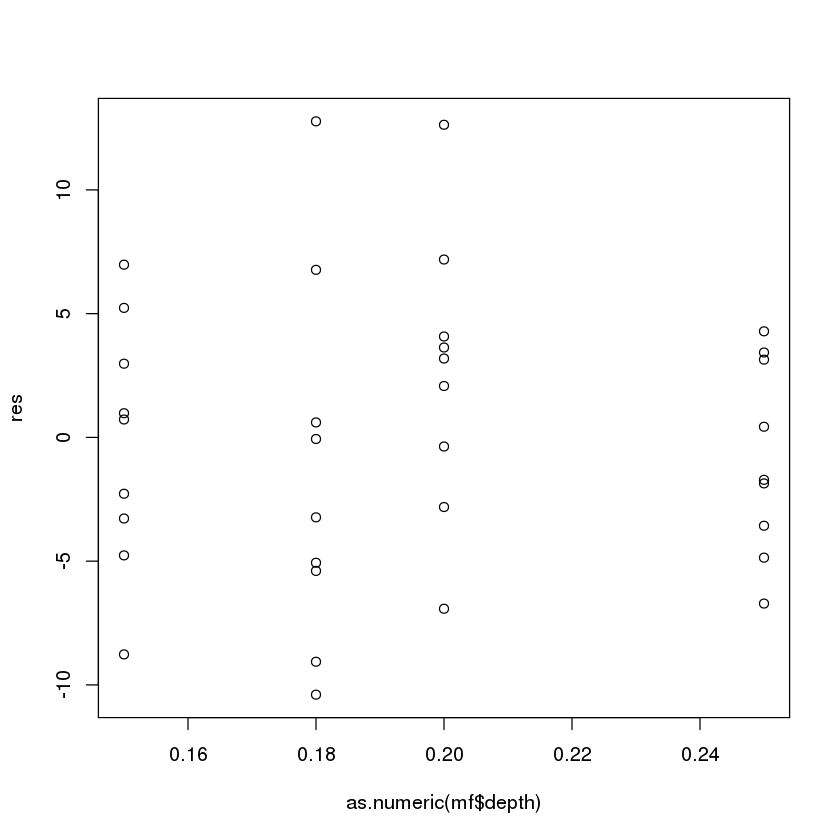

In [5]:

#But this not actually what we should compute when the interaction is significant.
#Eg.If we decide to study the material effect at 70 degree, 
#we use the following way to compute means contrast (between two levels of material) in presence of a significant interaction.
mf.fr20=subset(mf, feedrate==0.20)
mm=with(mf.fr20, aggregate(finish,list(M=feedrate),mean))
mm
tk.cri=qtukey(.95,a,a*b*(n-1))*sqrt(mse/n)
diff.mm=c(d.3.1=mm$x[3]-mm$x[1],d.3.2=mm$x[3]-mm$x[2],d.2.1=mm$x[2]-mm$x[1])
names(which(abs(diff.mm) > tk.cri))
#In conclusion, only Material type 3 vs. type 1 and Material type 2 vs. type 1 
#appear to be significantly different when Temperature is fixed at 70 degree.

#model adequacy checking
plot(mf.aov)



#alternative way
mf.lm=lm(finish ~ depth*feedrate,mf)
res=mf$finish-fitted(mf.lm)
library(car)
qqPlot(res)
plot(fitted(mf.lm), res) 
plot(as.numeric(mf$feedrate), res)
plot(as.numeric(mf$depth), res)



#### 5.6
For data in 5.4 compute a 95 percent confidence interval estimate of the mean difference in response for feed rates of 0.20 and 0.25 in/min.

In [6]:

#construct confidence interval for mu1-mu2
me=tcri*sp*sqrt(1/n1+1/n2)
CI=c(ybar1-ybar2-me,ybar1-ybar2+me)
CI


ERROR: Error in eval(expr, envir, enclos): object 'tcri' not found


#### 5.7 
Johnson and Leone (statistics and exp design in engineering and the physical sciences, wiley, 1977) describe an experiment to investigate warping of copper plates. The two factors studied were the temperature and the copper content of the plates. The response variable was a measure of the amputn of warping. The data were as following: 

* Is there any indication that either fators affects the amount of warping? Is there any interaction between the factors? Use $\alpha=0.05$
* Analyze the residuals from this experiment
* Plot the average warping at each level of copper content and compare them to a appropriately scaled t distribution. Describe the differences in the effects of the different levels of copper content on warping. If low warping is desirable, what level of copper content would you specify?
* Suppose that the temperature cannot be earily controlled in the environment in which the copper plates are to ve used. Does this change your answer for part (c)?

#### Answer:


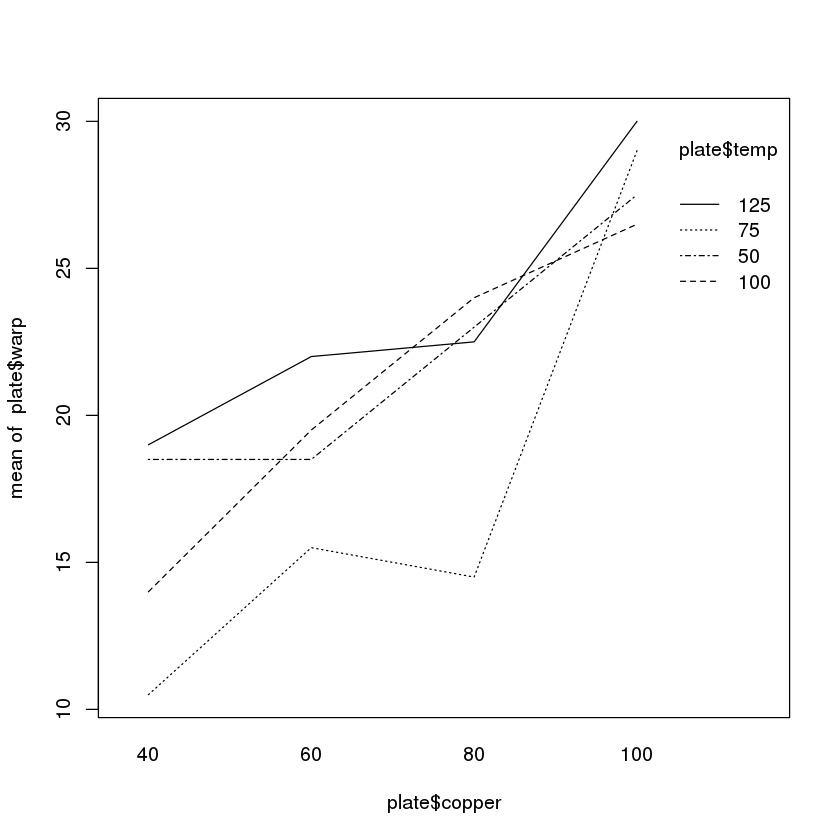

In [18]:
copper = rep(rep(c(40, 60, 80, 100), each=2), 4)
temp = rep(c(50,75,100,125), each=8)
warp = c(17,20,16,21,24,22,28,27,12,9,18,13,17,12,27,31,16,12,18,21,25,23,30,23,21,17,23,21,23,22,29,31)
plate = data.frame(copper,temp,warp)
#################################
##     Interaction plot         #
#################################
interaction.plot(plate$copper, plate$temp, plate$warp)


     copper         temp             warp      
 Min.   : 40   Min.   : 50.00   Min.   : 9.00  
 1st Qu.: 55   1st Qu.: 68.75   1st Qu.:17.00  
 Median : 70   Median : 87.50   Median :21.00  
 Mean   : 70   Mean   : 87.50   Mean   :20.91  
 3rd Qu.: 85   3rd Qu.:106.25   3rd Qu.:24.25  
 Max.   :100   Max.   :125.00   Max.   :31.00  

            Df Sum Sq Mean Sq F value   Pr(>F)    
temp         1   26.4    26.4   1.858    0.184    
copper       1  652.1   652.1  45.868 2.35e-07 ***
temp:copper  1    0.2     0.2   0.015    0.904    
Residuals   28  398.0    14.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

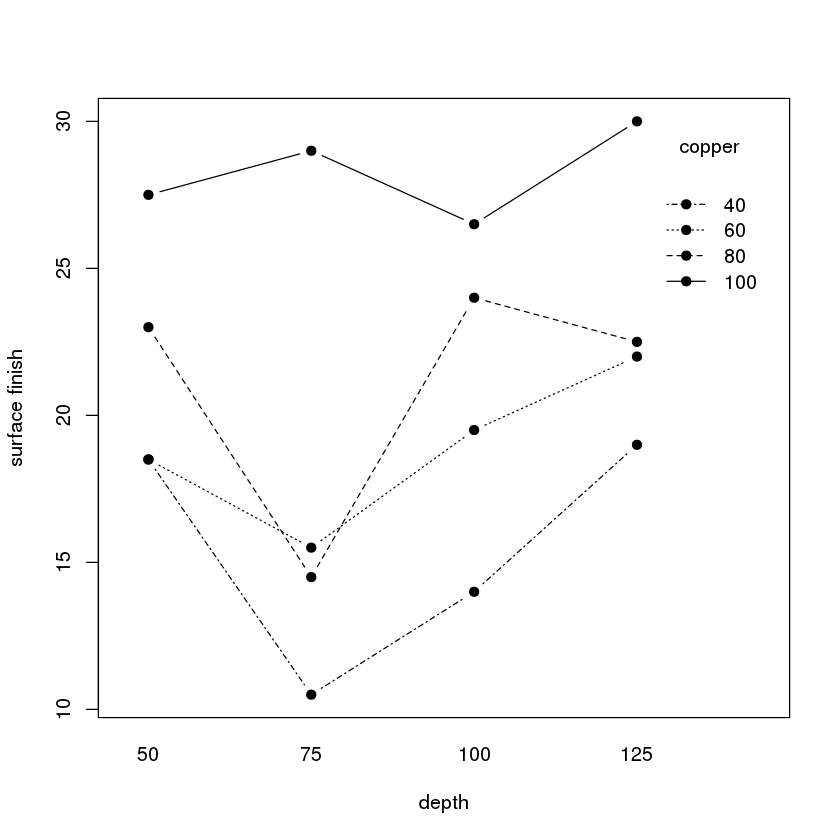

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: temp”Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: copper”Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: temp, copper”

ERROR: Error in TukeyHSD.aov(plate.aov, which = "temp"): no factors in the fitted model


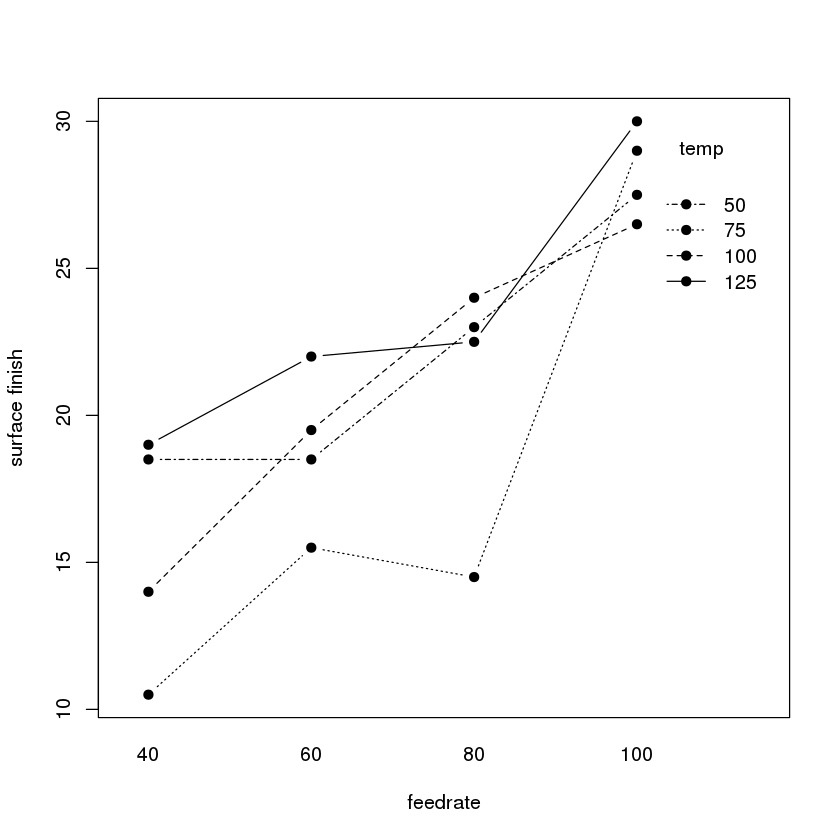

In [19]:
################################################################
##    Statistical analysis of the two-factor factorial design  #
################################################################
summary(plate)
a=4;b=4;n=2

plate.aov=aov(warp ~ temp*copper,data=plate)
summary(plate.aov)
mse=summary(plate.aov)[[1]][4,3]

#create interaction plots
with(plate, interaction.plot(temp,copper,warp,type="b",pch=19, fixed=T,xlab="depth",ylab="surface finish"))
with(plate, interaction.plot(copper,temp,warp,type="b",pch=19, fixed=T,xlab="feedrate",ylab="surface finish"))

#multiple comparisons (Tukey's method)
#compare the main effect difference
TukeyHSD(plate.aov, which="temp") 
#compare the main effect difference 
TukeyHSD(plate.aov, which="copper") 

In [22]:
##################################################################
##    Fitting response curves and surfaces                       #
##################################################################
#create response curve (one quantitative factor)
plate.lm1=lm(warp ~ temp*copper + I(temp^2), data=plate)
summary(plate.lm1)

ngrid=20
tg=with(plate, seq(min(temp), max(temp), length = ngrid))
M=as.factor(plate$copper)
grid=expand.grid(temp = tg, copper=M)
yhat=predict(plate.lm1, grid)
yhat=matrix(yhat, nrow = length(tg))
matplot(tg, yhat, type = "l", xlab = "Temperature")
abline(v = c(15, 70, 125), lty = 2)
legend("topright", legend = paste("copper", levels(M)),lty = 1:3, col = 1:3)



Call:
lm(formula = warp ~ temp * copper + I(temp^2), data = plate)

Residuals:
   Min     1Q Median     3Q    Max 
-8.816 -1.840  0.400  1.876  6.114 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 22.0412500  9.1367572   2.412  0.02291 * 
temp        -0.4396500  0.1799925  -2.443  0.02141 * 
copper       0.2132500  0.0871082   2.448  0.02114 * 
I(temp^2)    0.0027500  0.0009483   2.900  0.00733 **
temp:copper -0.0001300  0.0009483  -0.137  0.89198   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.353 on 27 degrees of freedom
Multiple R-squared:  0.7181,	Adjusted R-squared:  0.6764 
F-statistic:  17.2 on 4 and 27 DF,  p-value: 4.029e-07


ERROR: Error: variable 'copper' was fitted with type "numeric" but type "factor" was supplied


M,x
80,21


character(0)

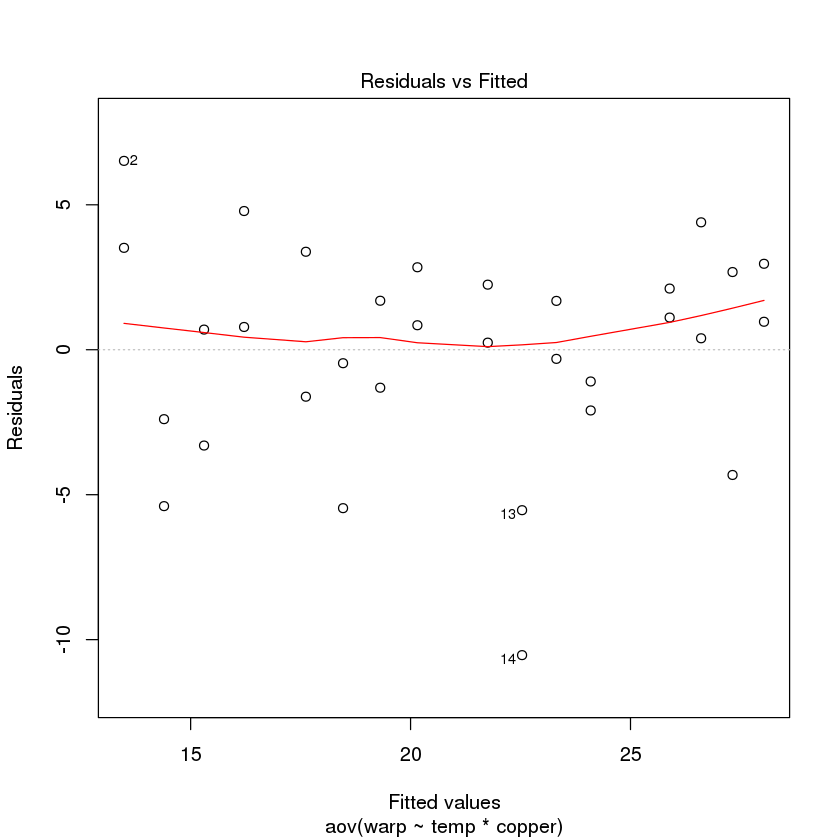

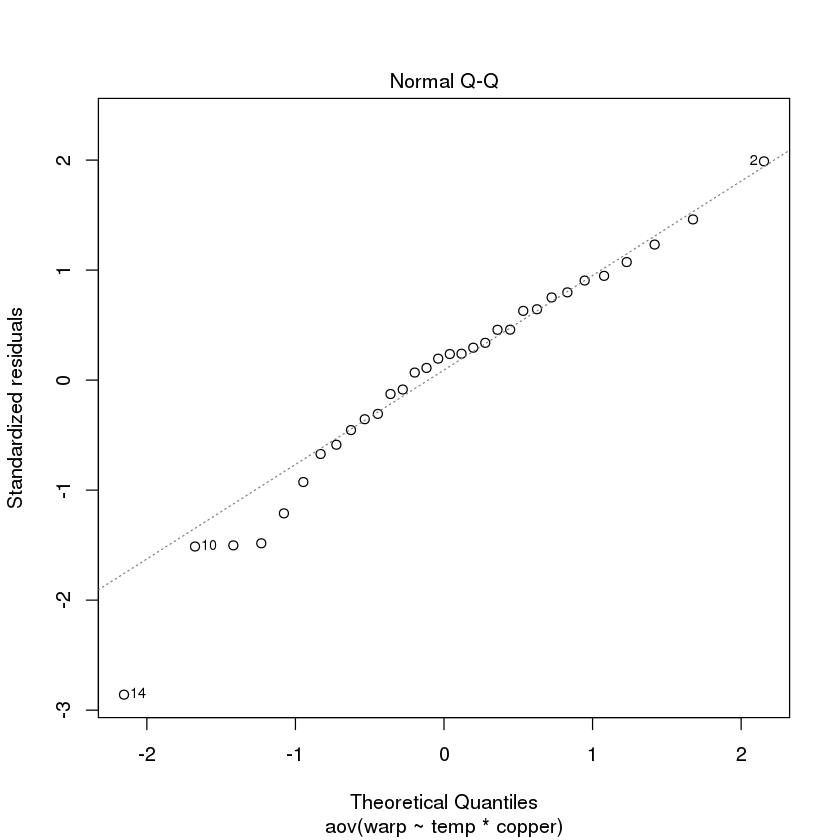

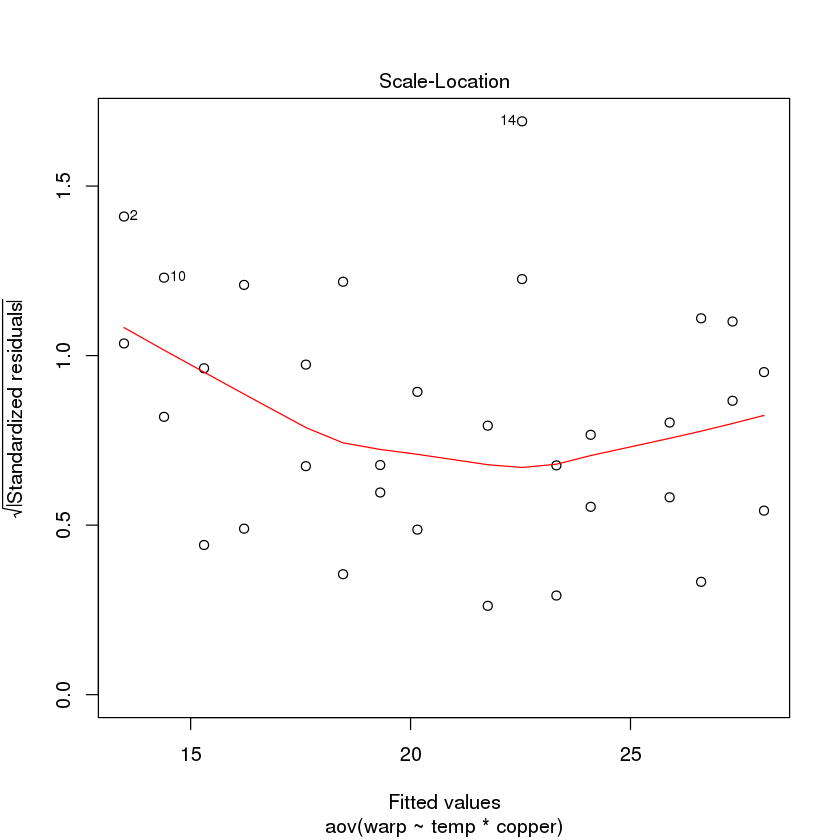

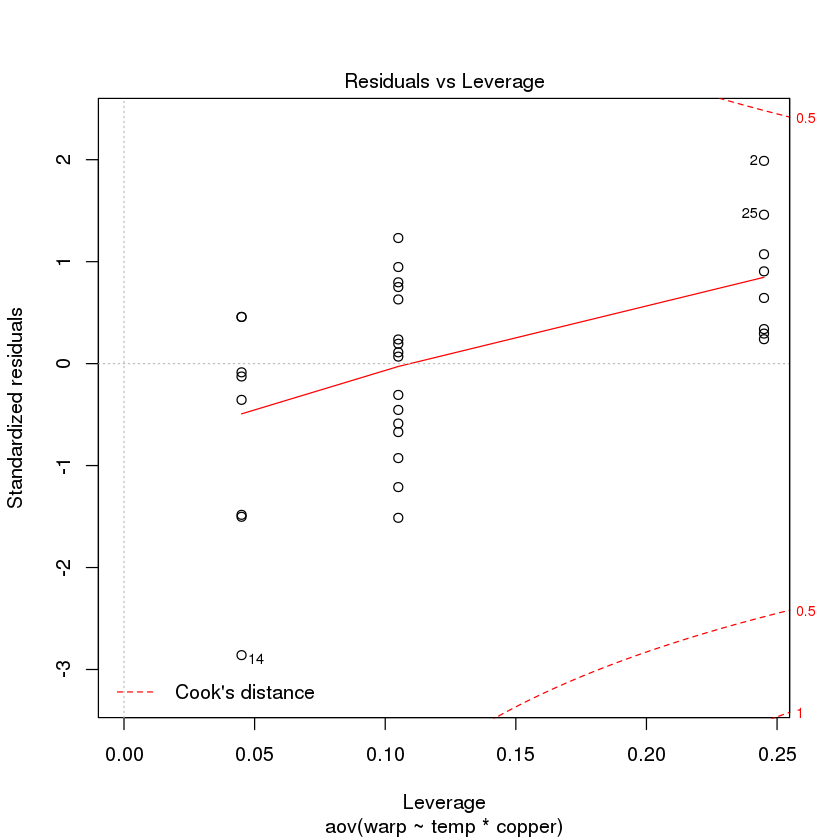

[1] 14  2

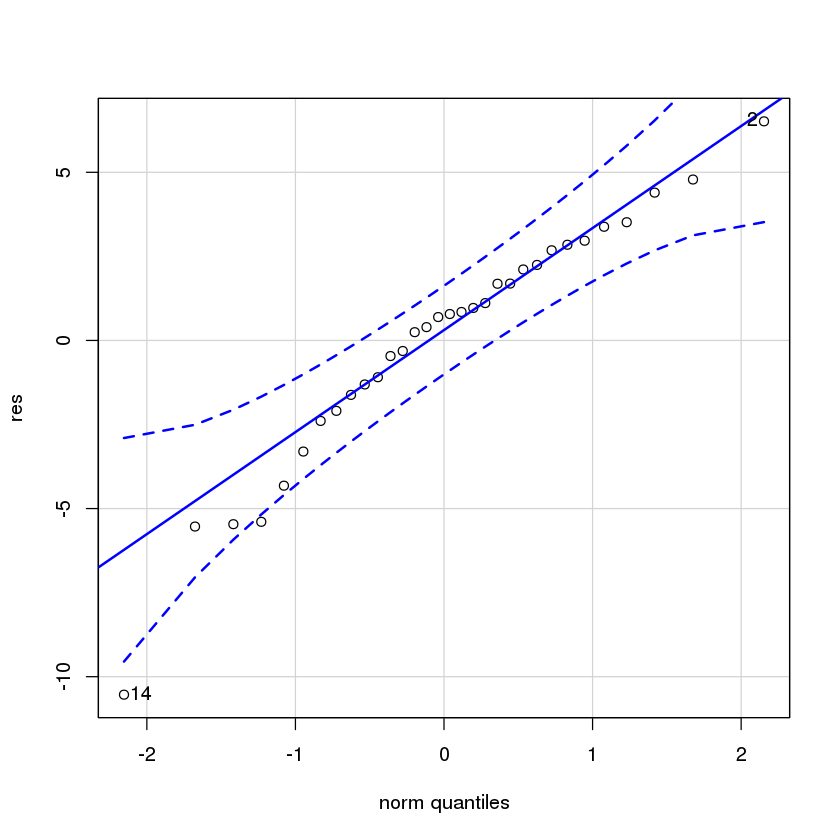

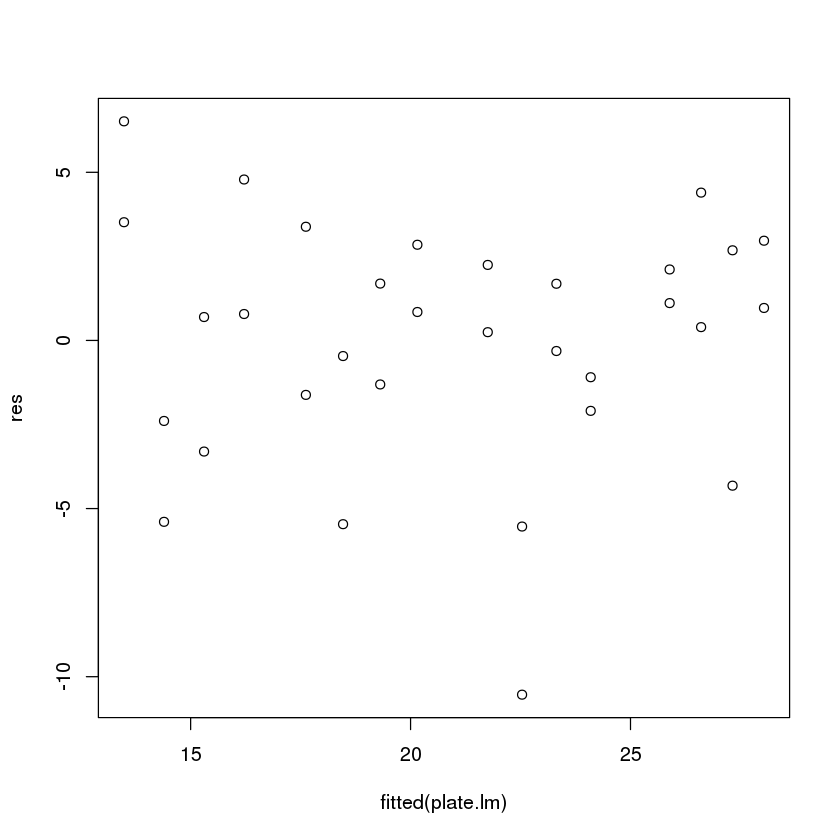

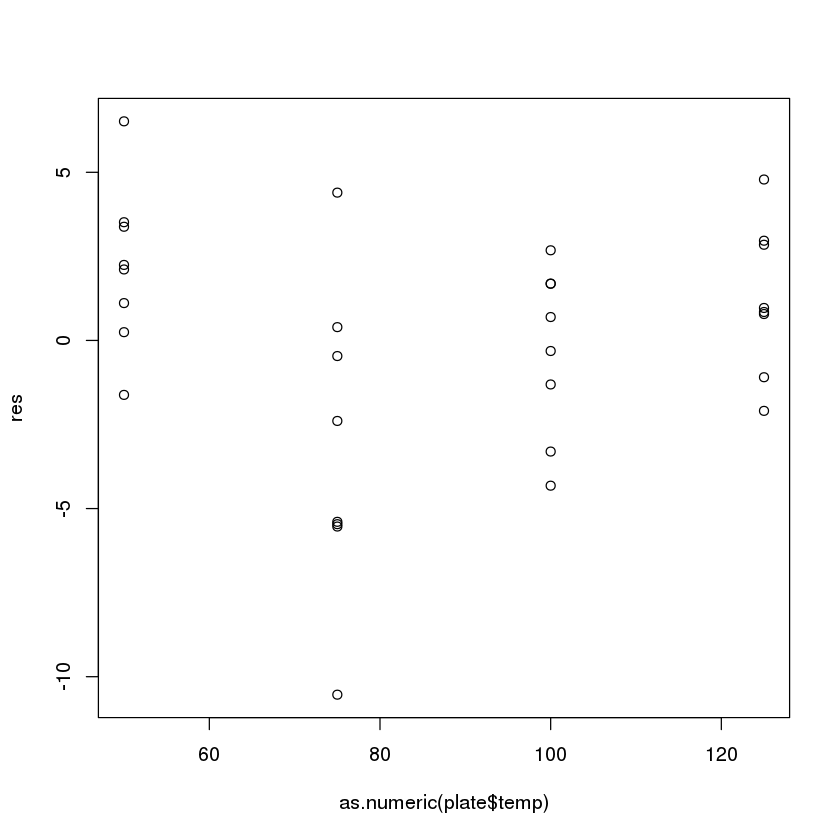

ERROR: Error in eval(predvars, data, env): object 'wrap' not found


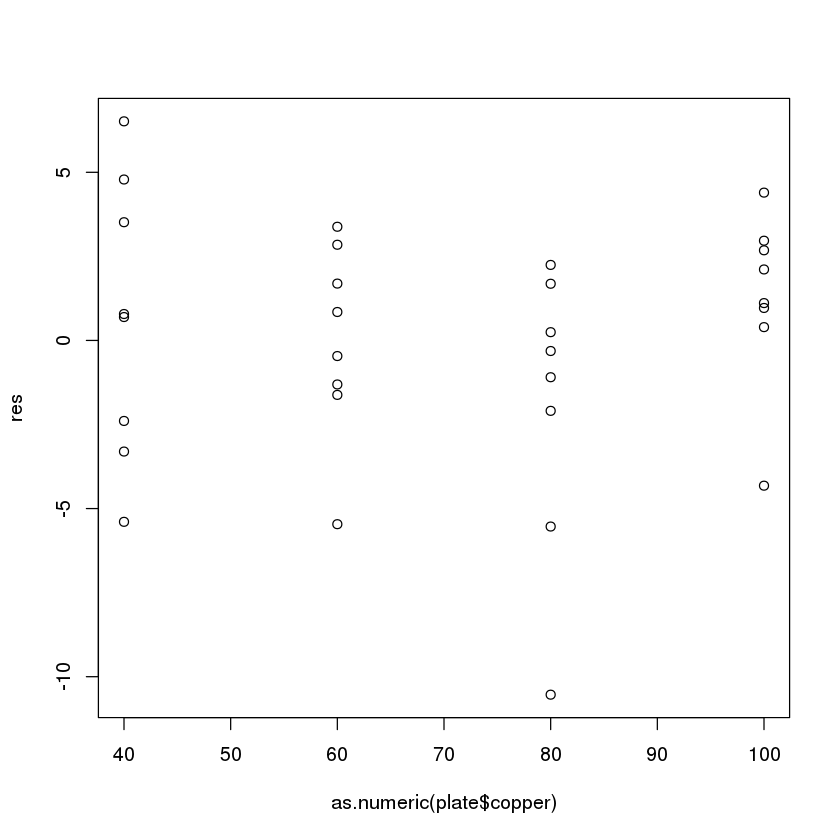

In [21]:

#But this not actually what we should compute when the interaction is significant.
#Eg.If we decide to study the material effect at 70 degree, 
#we use the following way to compute means contrast (between two levels of material) in presence of a significant interaction.
plate.c80=subset(plate, copper==80)
mm=with(plate.c80, aggregate(warp,list(M=copper),mean))
mm
tk.cri=qtukey(.95,a,a*b*(n-1))*sqrt(mse/n)
diff.mm=c(d.3.1=mm$x[3]-mm$x[1],d.3.2=mm$x[3]-mm$x[2],d.2.1=mm$x[2]-mm$x[1])
names(which(abs(diff.mm) > tk.cri))
#In conclusion, only Material type 3 vs. type 1 and Material type 2 vs. type 1 
#appear to be significantly different when Temperature is fixed at 70 degree.

#model adequacy checking
plot(plate.aov)

#alternative way
plate.lm=lm(warp ~ temp*copper,plate)
res=plate$warp-fitted(plate.lm)
library(car)
qqPlot(res)
plot(fitted(plate.lm), res) 
plot(as.numeric(plate$temp), res)
plot(as.numeric(plate$copper), res)


#ANOVA without interaction (be careful in dropping the interaction term)
plate.aov2=aov(wrap~copper+temp,data=plate)
summary(plate.aov2)
plot(plate.aov2)


#### 5.8
The factors that influenxe the breaking strength of a synthestic fiber are being studied. Foru production machines and three operators are chosen and a factorial experiment is run using fiber from the same production batch. The results are as follows:

      mach            op         bstr      
 Min.   :1.00   Min.   :1   Min.   :108.0  
 1st Qu.:1.75   1st Qu.:1   1st Qu.:110.0  
 Median :2.50   Median :2   Median :111.5  
 Mean   :2.50   Mean   :2   Mean   :112.3  
 3rd Qu.:3.25   3rd Qu.:3   3rd Qu.:114.2  
 Max.   :4.00   Max.   :3   Max.   :120.0  

            Df Sum Sq Mean Sq F value   Pr(>F)    
mach         1   6.07    6.07   1.281   0.2711    
op           1 144.00  144.00  30.369 2.15e-05 ***
mach:op      1  18.05   18.05   3.807   0.0652 .  
Residuals   20  94.83    4.74                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

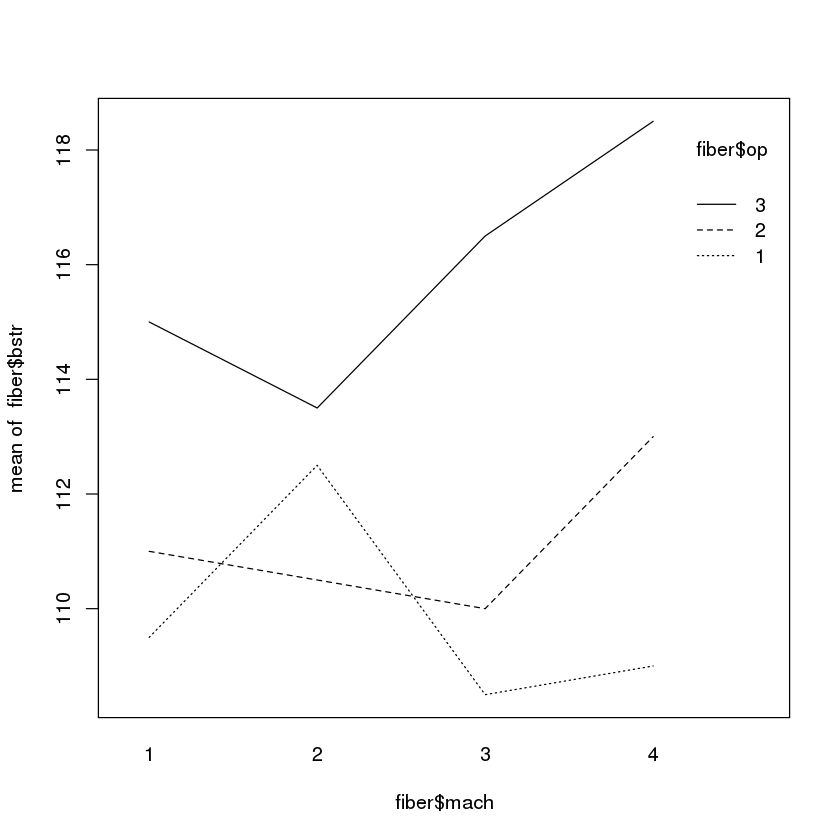

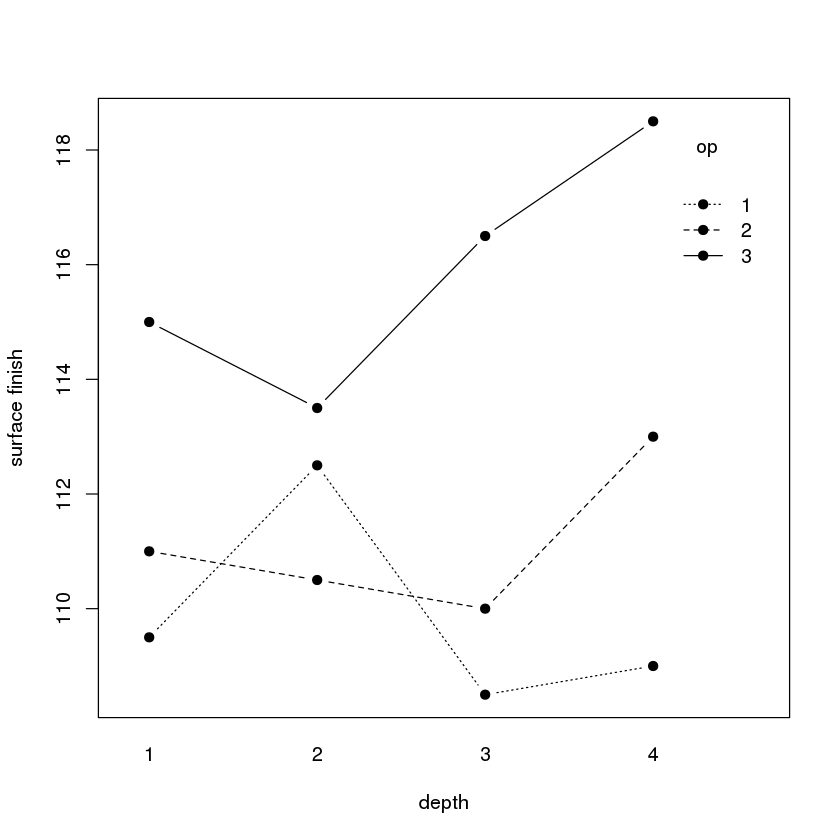

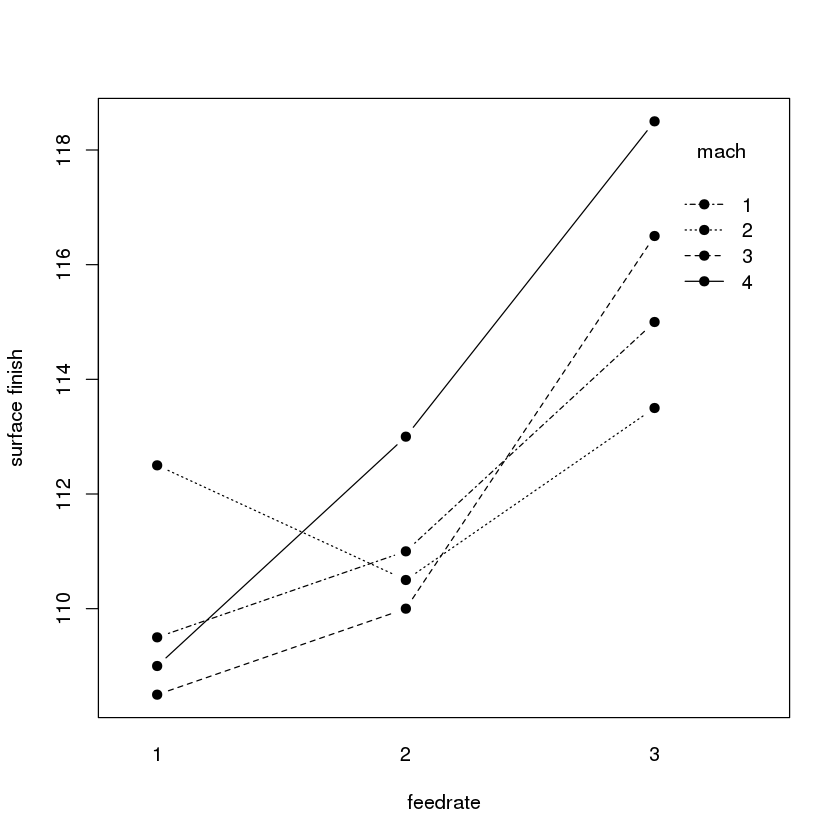

In [47]:
mach = rep(rep(c(1,2,3,4), each=2),3)
op = rep(c(1,2,3), each=8)
bstr = c(109,110,110,115,108,109,110,108,110,112,110,111,111,109,114,112,116,114,112,115,114,119,120,117)
fiber = data.frame(mach, op,bstr)

#################################
##     Interaction plot         #
#################################
interaction.plot(fiber$mach, fiber$op, fiber$bstr)

################################################################
##    Statistical analysis of the two-factor factorial design  #
################################################################
summary(fiber)
a=4;b=4;n=2

fiber.aov=aov(bstr ~ mach*op,data=fiber)
summary(fiber.aov)
mse=summary(fiber.aov)[[1]][4,3]

#create interaction plots
with(fiber, interaction.plot(mach,op,bstr,type="b",pch=19, fixed=T,xlab="depth",ylab="surface finish"))
with(fiber, interaction.plot(op,mach,bstr,type="b",pch=19, fixed=T,xlab="feedrate",ylab="surface finish"))


#### 5.22
Consider the data in problem 5.7. Analyse the data assuming that replicates are blocks. 

#### 5.23
Consider the data in problem 5.8. Analyze the data assuming that replicates are blocks


#### 5.26
An experiment was conducted to study the life (in hours) of two different brands of batteries in three different devices (radio, camera, and portable DVD player). A completely randomized two-facotr factorial experiment was conducted and the following data resulted. 

In [ ]:
battery = rep(c("a","b"), each=6)
device = rep(rep(c("radio","camera","dvd"), each=2),2)
life = c(8.6,8.2,7.9,8.4,5.4,5.7,9.4,8.8,8.5,8.9,5.8,5.9)
brand = data.frame(battery,device,life)
#################################
##     Interaction plot         #
#################################
interaction.plot(brand$battery, brand$device, brand$life)

################################################################
##    Statistical analysis of the two-factor factorial design  #
################################################################
summary(brand)
a=3;b=2;n=2

brand.aov=aov(life ~ device*battery,data=brand)
summary(brand.aov)
mse=summary(brand.aov)[[1]][4,3]

#create interaction plots
with(brand, interaction.plot(battery,device,bstr,type="b",pch=19, fixed=T,xlab="battery (brand)",ylab="life (hours)"))
with(brand, interaction.plot(device,battery,bstr,type="b",pch=19, fixed=T,xlab="device",ylab="life (hours)"))

#But this not actually what we should compute when the interaction is significant.
#Eg.If we decide to study the material effect at 70 degree, 
#we use the following way to compute means contrast (between two levels of material) in presence of a significant interaction.
brand.ba=subset(brand, battery=="a")
mm=with(brand.ba, aggregate(life,list(M=battery),mean))
mm
tk.cri=qtukey(.95,a,a*b*(n-1))*sqrt(mse/n)
diff.mm=c(d.3.1=mm$x[3]-mm$x[1],d.3.2=mm$x[3]-mm$x[2],d.2.1=mm$x[2]-mm$x[1])
names(which(abs(diff.mm) > tk.cri))
#In conclusion, only Material type 3 vs. type 1 and Material type 2 vs. type 1 
#appear to be significantly different when Temperature is fixed at 70 degree.

#model adequacy checking
plot(brand.aov)

#alternative way
brand.lm=lm(life ~ battery*device,mf)
res=brand$life-fitted(brand.lm)
library(car)
qqPlot(res)
plot(fitted(brand.lm), res) 
plot(as.numeric(brand$battery), res)
plot(as.numeric(brand$device), res)

#ANOVA without interaction (be careful in dropping the interaction term)
brand.aov2=aov(life~device+battery,data=brand)
summary(brand.aov2)
plot(brand.aov2)



In [11]:
##################################################################
##    Fitting response curves and surfaces                       #
##################################################################
#create response curve (one quantitative factor)
battery=read.table("data/battery-life.txt", header = TRUE) #example 5.1
battery.lm1=lm(Life ~ as.factor(Material) * (Temperature + I(Temperature^2)), battery)
summary(battery.lm1)

ngrid=20
tg=with(battery, seq(min(Temperature), max(Temperature), length = ngrid))
M=as.factor(battery$Material)
grid=expand.grid(Temperature = tg, Material=M)
yhat=predict(battery.lm1, grid)
yhat=matrix(yhat, nrow = length(tg))
matplot(tg, yhat, type = "l", xlab = "Temperature")
abline(v = c(15, 70, 125), lty = 2)
legend("topright", legend = paste("Material", levels(M)),lty = 1:3, col = 1:3)



Call:
aov(formula = Intensity ~ Ground * Filter + Error(Operator), 
    data = data)

Grand Mean: 94.91667

Stratum 1: Operator

Terms:
                Residuals
Sum of Squares   402.1667
Deg. of Freedom         3

Residual standard error: 11.57824

Stratum 2: Within

Terms:
                   Ground    Filter Ground:Filter Residuals
Sum of Squares   335.5833 1066.6667       77.0833  166.3333
Deg. of Freedom         2         1             2        15

Residual standard error: 3.329998
Estimated effects may be unbalanced

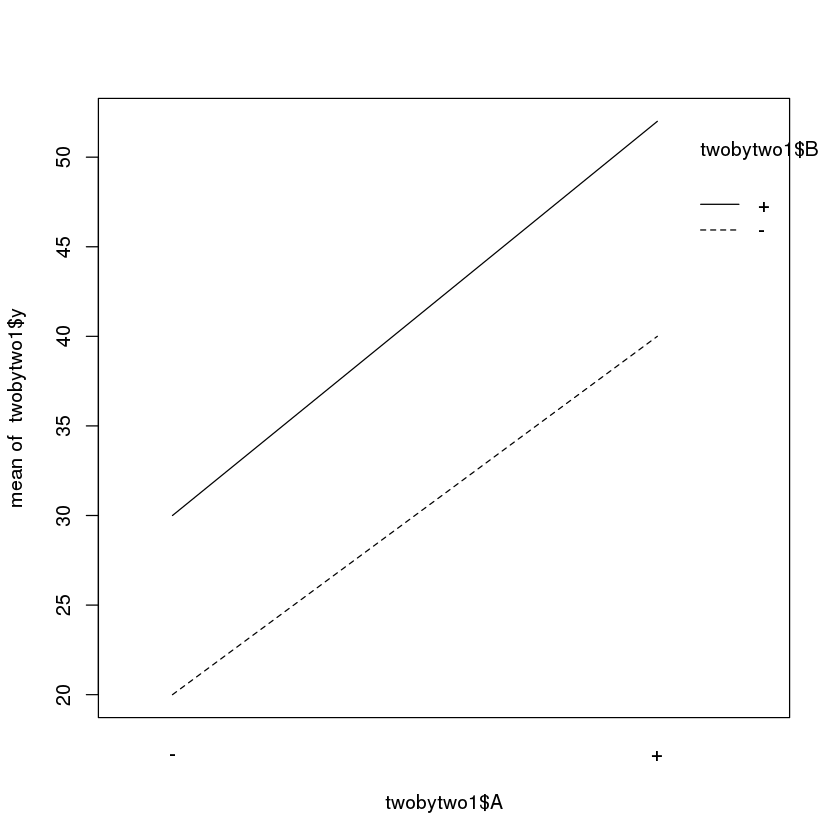

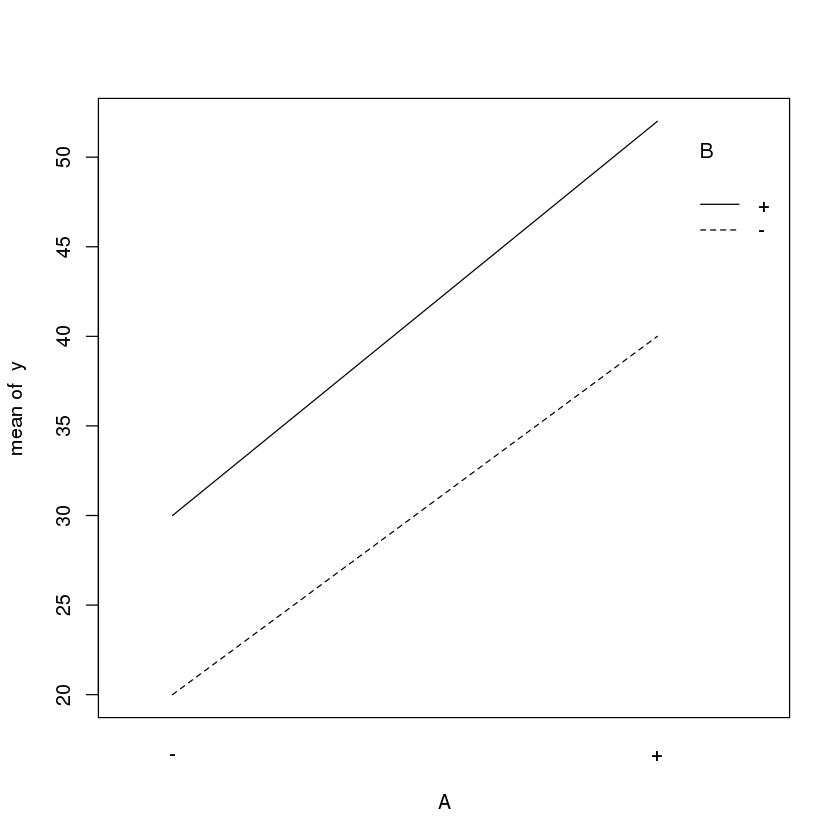

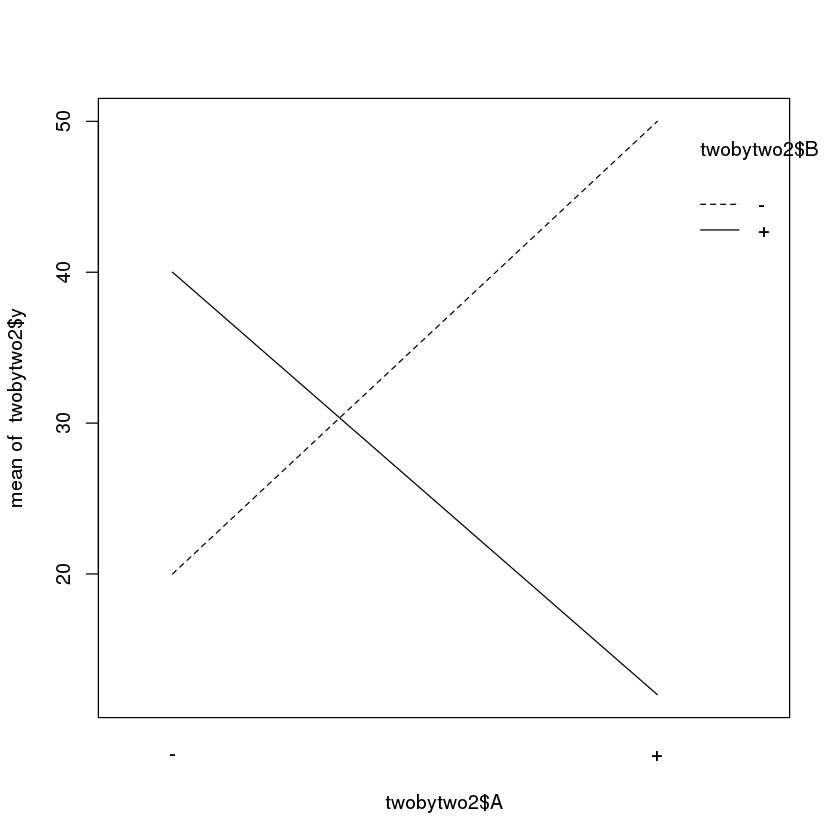


Call:
lm(formula = y ~ x1 + x2 + x1 * x2, data = twobytwo1)

Coefficients:
(Intercept)           x1           x2        x1:x2  
       35.5         10.5          5.5          0.5  


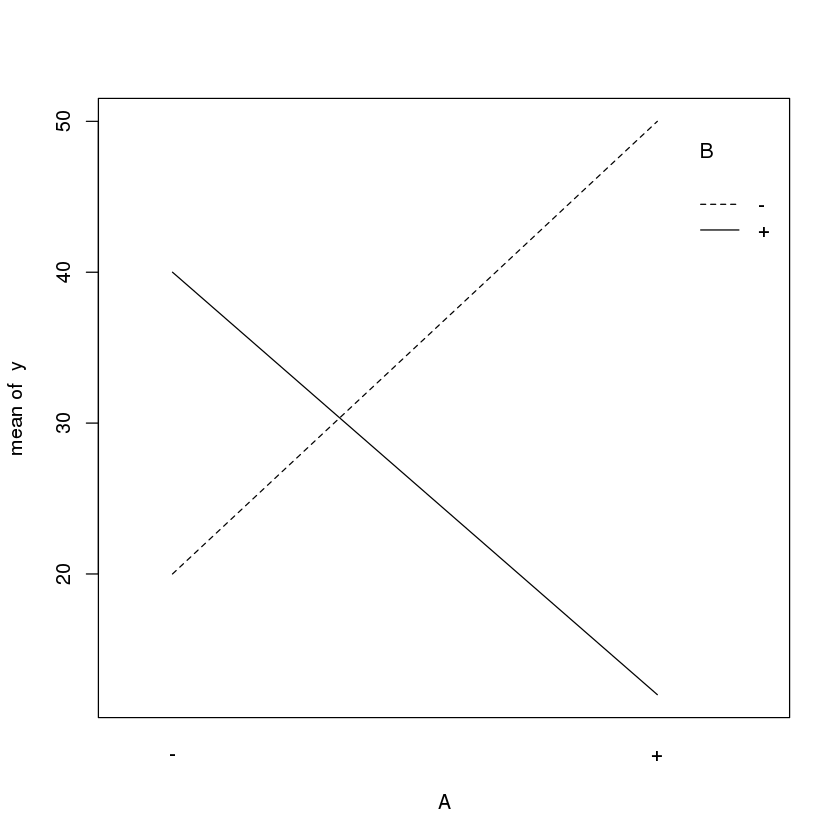


Call:
lm(formula = y ~ x1 + x2 + x1 * x2, data = twobytwo2)

Coefficients:
(Intercept)           x1           x2        x1:x2  
       30.5          0.5         -4.5        -14.5  


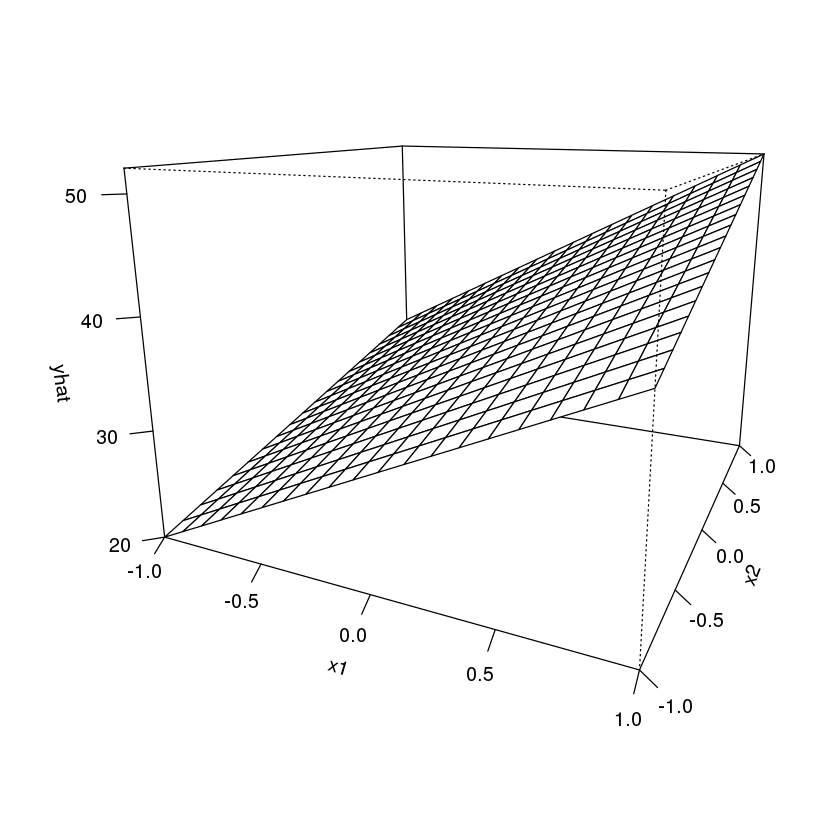

Warning message in file(file, "rt"):
“cannot open file 'data/battery-life.txt': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


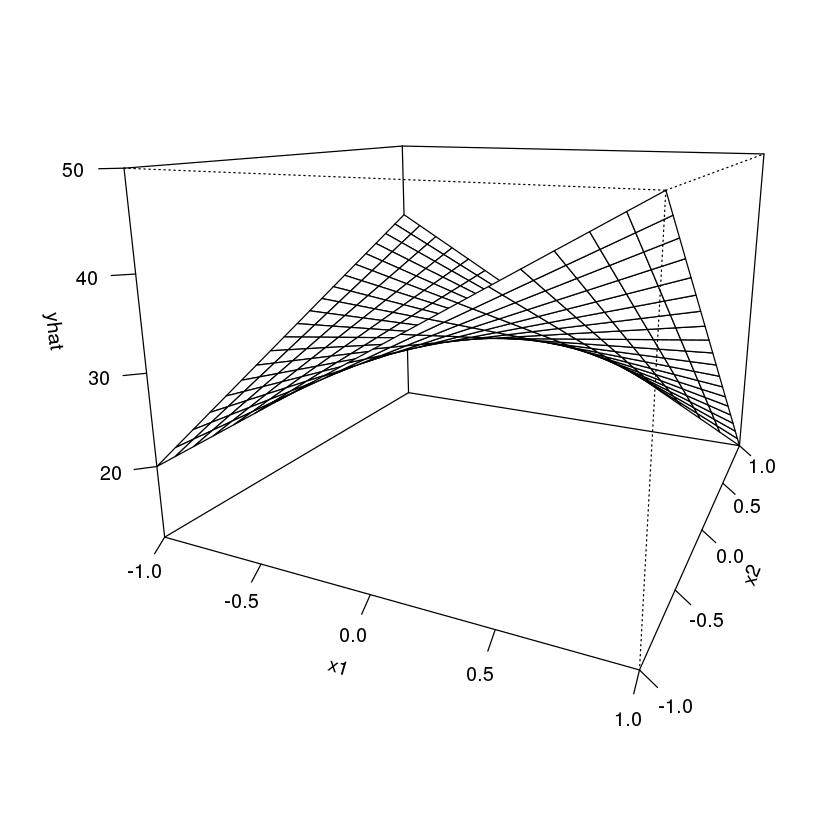

In [10]:
#################################
##     Interaction plot         #
#################################
#lines are parallel if interaction is 0
#Figure 5.1 example (p.184)
twobytwo1=data.frame(A = c("-", "+", "-", "+"),B = c("+", "+", "-", "-"),y = c(30, 52, 20, 40))
interaction.plot(twobytwo1$A, twobytwo1$B, twobytwo1$y)
# or, saving some typing:
with(twobytwo1, interaction.plot(A, B, y))

#Figure 5.2 example (p.184)
twobytwo2=data.frame(A = c("-", "+", "-", "+"),B = c("+", "+", "-", "-"), y = c(40, 12, 20, 50))
interaction.plot(twobytwo2$A, twobytwo2$B, twobytwo2$y)
# or, saving some typing:
with(twobytwo2, interaction.plot(A, B, y))

###################################################
##     model interaction using regression         #
###################################################
twobytwo1$x1=ifelse (twobytwo1$A == "+", 1, -1)
twobytwo1$x2=ifelse (twobytwo1$B == "+", 1, -1)
lm(y ~ x1 + x2 + x1 * x2, twobytwo1)

#making response surface plot
ngrid=20
#generate a sequence of length ngrid, min=-1, max=1
x1=with(twobytwo1, seq(min(x1), max(x1), length = ngrid)) 
x2=with(twobytwo1, seq(min(x2), max(x2), length = ngrid))
grid=expand.grid(x1 = x1, x2 = x2)
yhat=predict(lm(y ~ x1 * x2, twobytwo1), grid)
yhat=matrix(yhat, length(x1), length(x2))
persp(x1, x2, yhat, theta = 25, expand = 0.75, ticktype = "detailed")

#construct the plot for Figure 5.2 experiment
twobytwo2$x1=ifelse (twobytwo2$A == "+", 1, -1)
twobytwo2$x2=ifelse (twobytwo2$B == "+", 1, -1)
lm(y ~ x1 + x2 + x1 * x2, twobytwo2)

ngrid=20
x1=with(twobytwo2, seq(min(x1), max(x1), length = ngrid)) 
x2=with(twobytwo2, seq(min(x2), max(x2), length = ngrid))
grid=expand.grid(x1 = x1, x2 = x2)
yhat=predict(lm(y ~ x1 * x2, twobytwo2), grid)
yhat=matrix(yhat, length(x1), length(x2))
persp(x1, x2, yhat, theta = 25, expand = 0.75, ticktype = "detailed")


################################################################
##    Statistical analysis of the two-factor factorial design  #
################################################################
battery=read.table("data/battery-life.txt", header = TRUE); #example 5.1
battery$Material=as.factor(battery$Material) #factor A; a levels
battery$Temperature=as.factor(battery$Temperature) #factor B; b levels
summary(battery)
a=3;b=3;n=4

battery.aov=aov(Life ~ Material* Temperature,battery)
summary(battery.aov)
mse=summary(battery.aov)[[1]][4,3]

#create interaction plots
with(battery, interaction.plot(Temperature,Material,Life,type="b",pch=19, fixed=T,xlab="Temperature (◦F)",ylab="Average life"))
with(battery, interaction.plot(Material,Temperature,Life,type="b",pch=19, fixed=T,xlab="Material",ylab="Average life"))

#multiple comparisons (Tukey's method)
#compare the main effect difference
TukeyHSD(battery.aov, which="Material") 
#compare the main effect difference 
TukeyHSD(battery.aov, which="Temperature") 
#But this not actually what we should compute when the interaction is significant.
#Eg.If we decide to study the material effect at 70 degree, 
#we use the following way to compute means contrast (between two levels of material) in presence of a significant interaction.
battery.t70=subset(battery, Temperature==70)
mm=with(battery.t70, aggregate(Life,list(M=Material),mean))
mm
tk.cri=qtukey(.95,a,a*b*(n-1))*sqrt(mse/n)
diff.mm=c(d.3.1=mm$x[3]-mm$x[1],d.3.2=mm$x[3]-mm$x[2],d.2.1=mm$x[2]-mm$x[1])
names(which(abs(diff.mm) > tk.cri))
#In conclusion, only Material type 3 vs. type 1 and Material type 2 vs. type 1 
#appear to be significantly different when Temperature is fixed at 70 degree.

#model adequacy checking
plot(battery.aov)



#alternative way
battery.lm=lm(Life ~ Material*Temperature,battery)
res=battery$Life-fitted(battery.lm)
library(car)
qqPlot(res)
plot(fitted(battery.lm), res) 
plot(as.numeric(battery$Material), res)
plot(as.numeric(battery$Temperature), res)


#ANOVA without interaction (be careful in dropping the interaction term)
battery.aov2=aov(Life~Material+Temperature,data=battery)
summary(battery.aov2)
plot(battery.aov2)

#Tukey's 1-df nondadditivity(interaction) test (one observation per cell, n=1)
impurity=read.table("data/impurity.txt", header = TRUE)
#standard test doesn't perform test any more (df for SSE is zero)
impurity.aov=aov(Impurity ~ factor(Temperature)*factor(Pressure), impurity)
summary(impurity.aov)

no_itera.aov=aov(Impurity ~ factor(Temperature)+factor(Pressure), impurity)
summary(no_itera.aov)
z=fitted(no_itera.aov)^2
#read test result from the row of I(z): example 5.2
summary(aov(Impurity ~ factor(Temperature) + factor(Pressure)+ I(z), impurity))
##################################################################
##    Statistical analysis of the three-factor factorial design  #
##################################################################
softDrinkBottling=read.table("data/soft-drink-bottling.txt", header = TRUE)
softDrinkBottling=within(softDrinkBottling, {C=factor(Carbonation);P=factor(Pressure);S=factor(Speed)})
summary(aov(Height ~ C * P * S, softDrinkBottling))

#interaction plot
with(softDrinkBottling, interaction.plot(Carbonation, Pressure, Height))

#main effect plots
me_c=with(softDrinkBottling, tapply(Height,Carbonation,mean))
me_c
me_p=with(softDrinkBottling, tapply(Height,Pressure,mean))
me_p
me_s=with(softDrinkBottling, tapply(Height,Speed,mean))
me_s
plot(c(10,12,14),me_c,type="b",ylim=c(-2,8),xlab="Percent carbonation (A)",ylab="Average fill deviation")
plot(c(25,30),me_p,type="b",ylim=c(-2,8),xlab="Pressure (B)",ylab="Average fill deviation")
plot(c(200,250),me_s,type="b",ylim=c(-2,8),xlab="Line speed (C)",ylab="Average fill deviation")

##################################################################
##    Fitting response curves and surfaces                       #
##################################################################
#create response curve (one quantitative factor)
battery=read.table("data/battery-life.txt", header = TRUE) #example 5.1
battery.lm1=lm(Life ~ as.factor(Material) * (Temperature + I(Temperature^2)), battery)
summary(battery.lm1)

ngrid=20
tg=with(battery, seq(min(Temperature), max(Temperature), length = ngrid))
M=as.factor(battery$Material)
grid=expand.grid(Temperature = tg, Material=M)
yhat=predict(battery.lm1, grid)
yhat=matrix(yhat, nrow = length(tg))
matplot(tg, yhat, type = "l", xlab = "Temperature")
abline(v = c(15, 70, 125), lty = 2)
legend("topright", legend = paste("Material", levels(M)),lty = 1:3, col = 1:3)

#create response surfaces(two or more quantitative factors)
toolLife=read.csv("data/tool-life.csv")
tool.lm=lm(Life~Angle*Speed+I(Angle^2)*I(Speed^2)+Angle:I(Speed^2)+I(Angle^2):Speed,toolLife)
summary(tool.lm)
tmp.angle=seq(15,25,by=.1)
tmp.speed=seq(125,175,by=.5)
grid=expand.grid(Angle=tmp.angle , Speed = tmp.speed)
yhat=predict(tool.lm, grid)
yhat=matrix(yhat, length(tmp.angle), length(tmp.speed))
persp(tmp.angle, tmp.speed, yhat, theta = 25, expand = 0.75, ticktype = "detailed")

#blocking in a factorial design
Intensity=c(90,102,114,86,87,93,96,106,112,84,90,91,100,105,108,92,97,95,92,96,98,81,80,83)
Filter=rep(c(rep(1,3),rep(2,3)),4)
Operator=c(rep(1,6),rep(2,6),rep(3,6),rep(4,6))
cell=c("L","M","H")
Ground=rep(cell,8)
data=data.frame(Intensity=Intensity,Filter=as.factor(Filter), Operator=as.factor(Operator),Ground=as.factor(Ground))
aov(formula = Intensity ~ Ground * Filter + Error(Operator),
    data = data)
#Stratum 1: SS_blocks
#Stratum 2, SS_A, SS_B, SS_AB, SS_E



In [ ]:

#But this not actually what we should compute when the interaction is significant.
#Eg.If we decide to study the material effect at 70 degree, 
#we use the following way to compute means contrast (between two levels of material) in presence of a significant interaction.
battery.t70=subset(battery, Temperature==70)
mm=with(battery.t70, aggregate(Life,list(M=Material),mean))
mm
tk.cri=qtukey(.95,a,a*b*(n-1))*sqrt(mse/n)
diff.mm=c(d.3.1=mm$x[3]-mm$x[1],d.3.2=mm$x[3]-mm$x[2],d.2.1=mm$x[2]-mm$x[1])
names(which(abs(diff.mm) > tk.cri))
#In conclusion, only Material type 3 vs. type 1 and Material type 2 vs. type 1 
#appear to be significantly different when Temperature is fixed at 70 degree.

#model adequacy checking
plot(battery.aov)



#alternative way
battery.lm=lm(Life ~ Material*Temperature,battery)
res=battery$Life-fitted(battery.lm)
library(car)
qqPlot(res)
plot(fitted(battery.lm), res) 
plot(as.numeric(battery$Material), res)
plot(as.numeric(battery$Temperature), res)


#ANOVA without interaction (be careful in dropping the interaction term)
battery.aov2=aov(Life~Material+Temperature,data=battery)
summary(battery.aov2)
plot(battery.aov2)

#Tukey's 1-df nondadditivity(interaction) test (one observation per cell, n=1)
impurity=read.table("data/impurity.txt", header = TRUE)
#standard test doesn't perform test any more (df for SSE is zero)
impurity.aov=aov(Impurity ~ factor(Temperature)*factor(Pressure), impurity)
summary(impurity.aov)

no_itera.aov=aov(Impurity ~ factor(Temperature)+factor(Pressure), impurity)
summary(no_itera.aov)
z=fitted(no_itera.aov)^2
#read test result from the row of I(z): example 5.2
summary(aov(Impurity ~ factor(Temperature) + factor(Pressure)+ I(z), impurity))